In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/WignerMolecule.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/WignerMolecule.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.6
  [780c37f4] Carlo v0.2.5
  [074ae576] CarloAnalysis v1.0.0-DEV `https://github.com/PatXue/CarloAnalysis.jl#main`
  [a93c6f00] DataFrames v1.8.0
  [e9467ef8] GLMakie v0.13.6
  [f67ccb44] HDF5 v0.17.2
  [033835bb] JLD2 v0.6.2
  [ebeed567] PeriodicArrays v0.1.0 `https://github.com/PatXue/PeriodicArrays.jl#main`
  [90137ffa] StaticArrays v1.9.15


In [2]:
using CairoMakie
using Carlo.ResultTools
using CarloAnalysis
using DataFrames
using GLMakie
using HDF5
using JLD2
using LinearAlgebra
using PeriodicArrays
using StaticArrays

In [3]:
function generate_spins(jobname, task_no)
    fig = Figure(size=(800, 400))

    task_str = lpad(task_no, 4, "0")
    h5open("../jobs/$jobname.data/task$task_str/run0001.dump.h5") do file
        spins = map(
            t -> [t[:data][1], t[:data][2], t[:data][3]],
            read(file, "simulation/spins")
        )
        spin_xs = map(v -> v[1], spins)
        spin_ys = map(v -> v[2], spins)
        spin_zs = map(v -> v[3], spins)
        Lx, Ly = size(spins)
        fig[1,1] = Axis(fig; title="Spins", backgroundcolor="black")
        strength = vec(spin_zs)
        arrows2d!(1:Lx, 1:Ly, spin_xs, spin_ys, lengthscale=0.5, align=:center, color=strength,
                  colorrange=(-1, 1))

        ηs = map(
            t -> [t[:data][1], t[:data][2], t[:data][3]],
            read(file, "simulation/etas")
        )
        η_xs = getindex.(ηs, 1)
        η_ys = getindex.(ηs, 2)
        η_zs = getindex.(ηs, 3)
        Lx, Ly = size(ηs)
        fig[1,2] = Axis(fig; title="ηs", backgroundcolor="black")
        strength = vec(η_zs)
        arrows2d!(1:Lx, 1:Ly, η_xs, η_ys, lengthscale=0.5, align=:center, color=strength,
                  colorrange=(-1, 1))
    end

    return fig
end

generate_spins (generic function with 1 method)

In [4]:
results = JobResult("../jobs", "stripe-anneal")

JobResult("../jobs", "stripe-anneal", 10×23 DataFrame
 Row │ ηz                T        init_T  etak_corrs                         _ ⋯
     │ Measurem…         Float64  Int64   Array…                             M ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │  0.00057±0.00051      0.5      10  Complex{Measurement{Float64}}[15…  0 ⋯
   2 │ -0.00072±0.00037      1.0      10  Complex{Measurement{Float64}}[15…  0
   3 │ -0.00029±0.00038      1.5      10  Complex{Measurement{Float64}}[14…  0
   4 │  0.00018±0.00034      2.0      10  Complex{Measurement{Float64}}[14…  0
   5 │ -2.8e-5±0.00053       2.5      10  Complex{Measurement{Float64}}[14…  0 ⋯
   6 │  1.6e-5±0.0003        3.0      10  Complex{Measurement{Float64}}[14…  0
   7 │  0.00028±0.00039      3.5      10  Complex{Measurement{Float64}}[14…  0
   8 │ -5.3e-5±0.00043       4.0      10  Complex{Measurement{Float64}}[15…  0
   9 │ -4.6e-5±0.00036       4.5      10  Complex{Measurement{Float

In [6]:
results[[:_ll_sweep_time, :_ll_measure_time]]

Row,_ll_sweep_time,_ll_measure_time
,Measurem…,Measurem…
1,0.0002928±7.1e-6,0.000159±3.9e-5
2,0.000433±1.3e-5,0.0002±5.7e-5
3,0.0004366±1.4e-6,0.000162±1.5e-5
4,0.0004401±4.7e-6,0.000173±2.2e-5
5,0.0004434±3.8e-6,0.000173±1.2e-5
6,0.0004397±3.2e-6,0.000188±3.0e-5
7,0.000468±1.2e-5,0.000184±1.7e-5
8,0.0004465±4.1e-6,0.000191±2.1e-5
9,0.0004505±7.4e-6,0.000191±1.7e-5


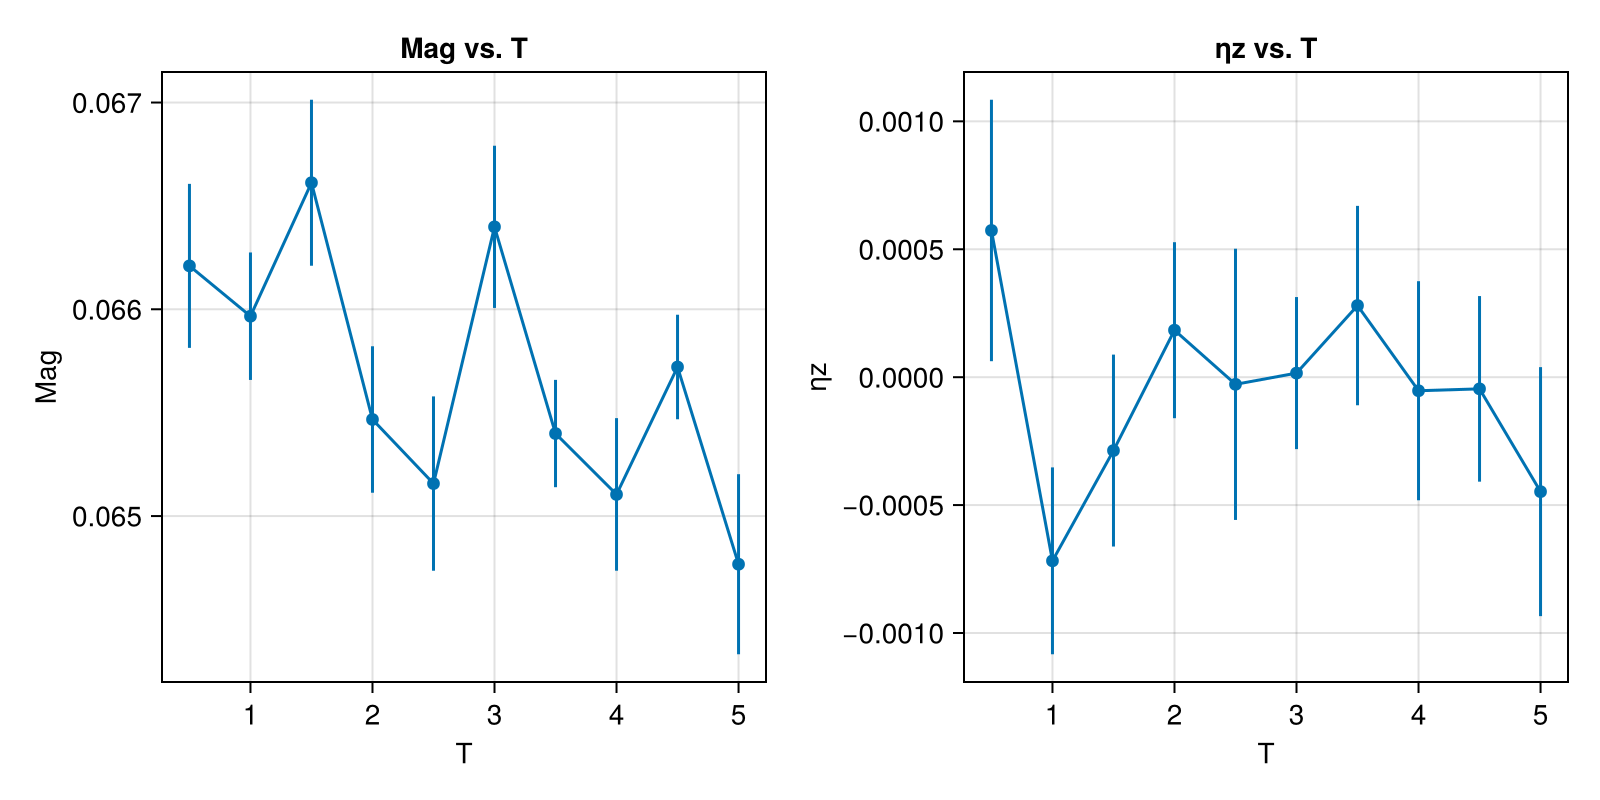

In [10]:
CairoMakie.activate!()

fig = Figure(size=(800, 400))
fig[1,1] = ax_s = Axis(fig, title="Mag vs. T", xlabel="T", ylabel="Mag")
generate_plot!(ax_s, :T, :Mag, results; line=true)
fig[1,2] = ax_η = Axis(fig, title="ηz vs. T", xlabel="T", ylabel="ηz")
generate_plot!(ax_η, :T, :ηz, results; line=true)
fig

In [11]:
spink_corrs = results[:spink_corrs]

10-element Vector{Matrix{Measurements.Measurement{Float64}}}:
 [824.8 ± 9.5 812.0 ± 5.7 … 726.5 ± 4.8 812.0 ± 5.7; 806.5 ± 8.0 811.6 ± 6.6 … 662.3 ± 5.1 757.7 ± 7.1; … ; 735.1 ± 5.5 664.4 ± 5.1 … 731.8 ± 8.9 745.0 ± 5.5; 806.5 ± 8.0 757.7 ± 7.1 … 757.4 ± 7.2 811.6 ± 6.6]
 [817.5 ± 7.8 806.9 ± 8.0 … 719.5 ± 4.8 806.9 ± 8.0; 794.0 ± 3.8 796.2 ± 5.5 … 663.2 ± 6.8 744.8 ± 6.1; … ; 719.0 ± 6.7 650.7 ± 4.8 … 730.1 ± 6.4 742.8 ± 7.4; 794.0 ± 3.8 744.8 ± 6.1 … 756.2 ± 7.9 796.2 ± 5.5]
 [835.0 ± 10.0 793.8 ± 7.6 … 719.4 ± 5.5 793.8 ± 7.6; 787.7 ± 5.7 794.2 ± 6.2 … 666.5 ± 4.9 744.9 ± 5.9; … ; 712.0 ± 6.8 657.2 ± 5.4 … 721.0 ± 5.3 750.8 ± 3.3; 787.7 ± 5.7 744.9 ± 5.9 … 730.8 ± 6.8 794.2 ± 6.2]
 [806.5 ± 8.7 789.3 ± 6.5 … 719.5 ± 4.9 789.3 ± 6.5; 795.2 ± 6.2 784.9 ± 6.7 … 660.3 ± 3.1 736.5 ± 6.4; … ; 717.8 ± 4.5 661.0 ± 4.4 … 715.9 ± 6.0 738.4 ± 8.0; 795.2 ± 6.2 736.5 ± 6.4 … 744.0 ± 5.2 784.9 ± 6.7]
 [800.1 ± 9.4 790.9 ± 5.0 … 720.1 ± 5.6 790.9 ± 5.0; 780.4 ± 5.7 785.2 ± 6.8 … 657.1 ± 5.1 731.7 

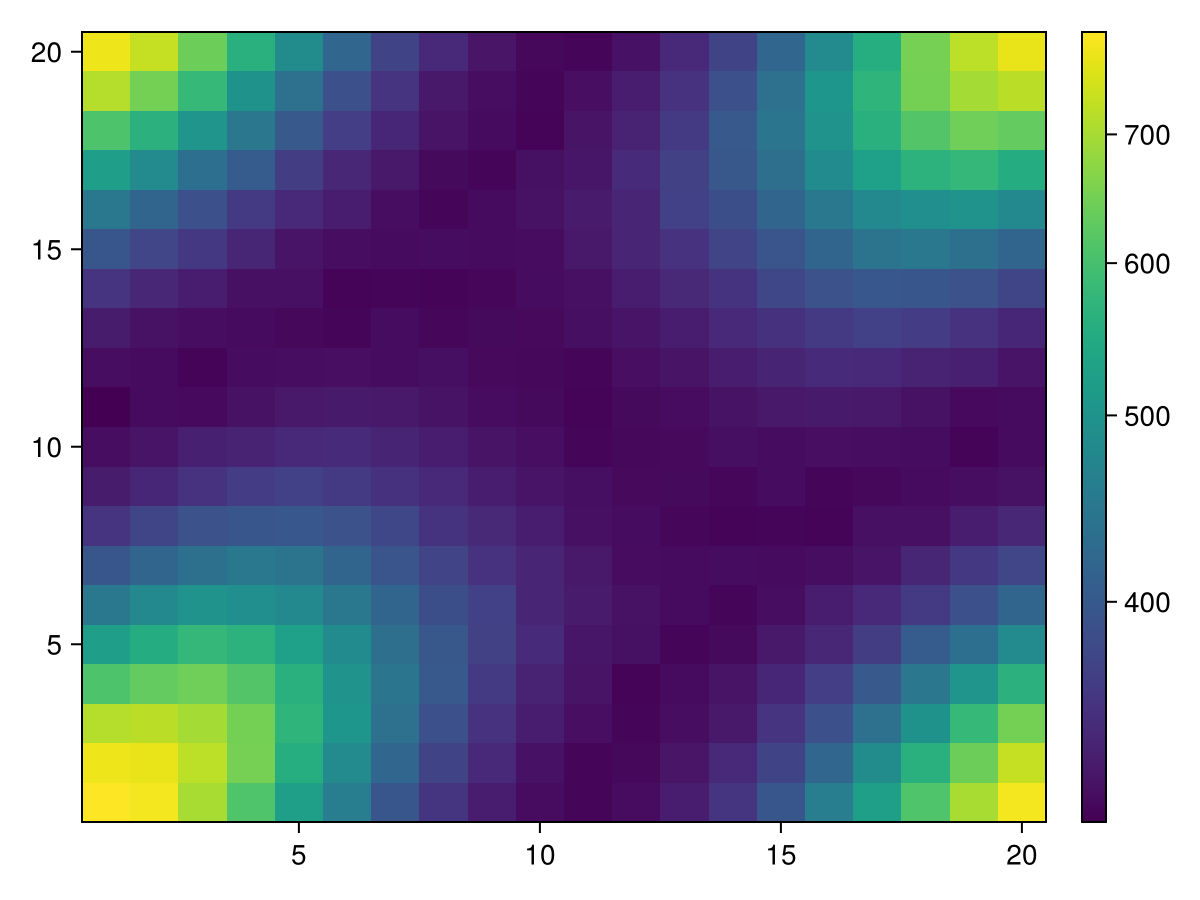

In [20]:
CairoMakie.activate!()
fig = Figure(size=(500, 500))
ax = fig[1,1] = Axis(fig; title="Spin_k")
scale = ReversibleScale(log)
fig, ax, hm = heatmap(getfield.(spink_corrs[10], :val), colorscale=scale)
Colorbar(fig[1, 2], hm)
fig

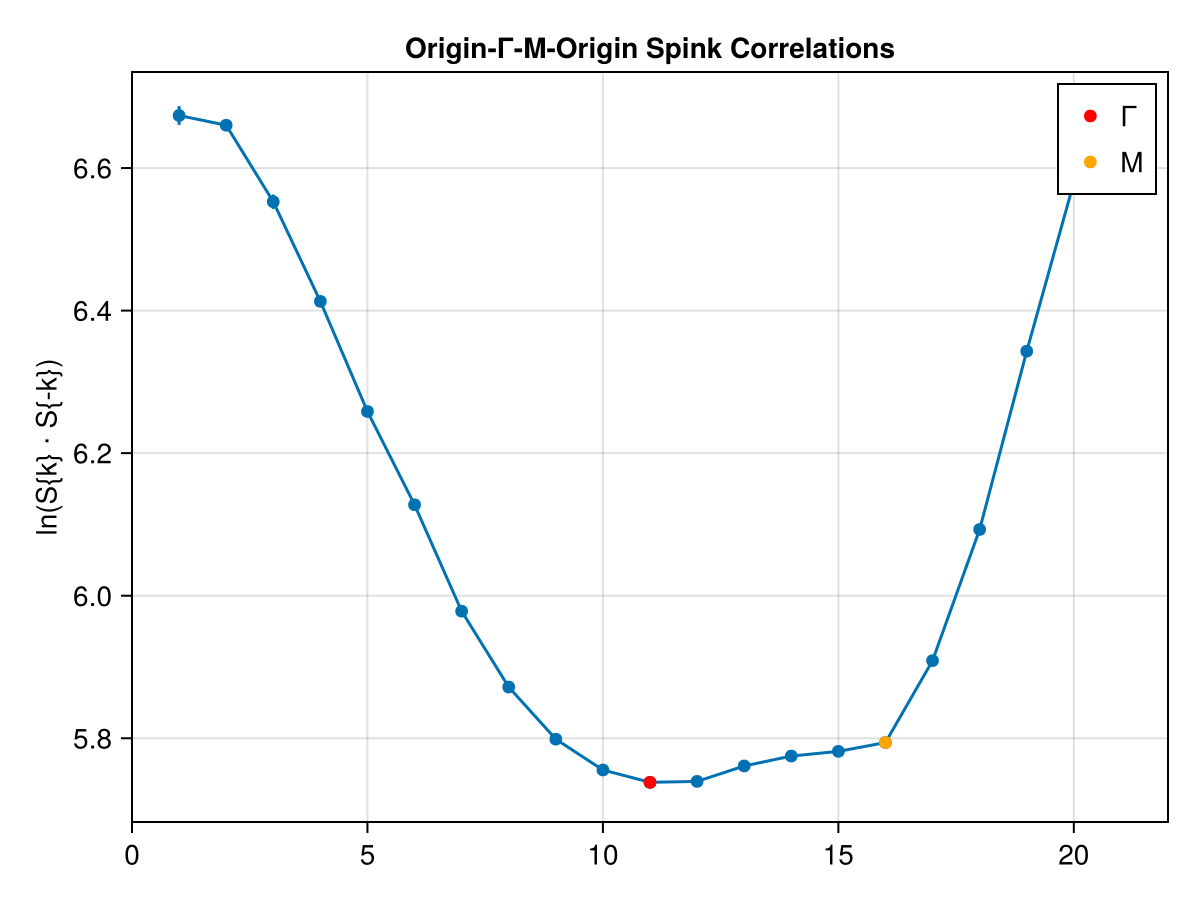

In [19]:
CairoMakie.activate!()
task_no = 10
Lx, Ly = size(spink_corrs[task_no])
borderx = div(Lx, 2) + 1
bordery = div(Ly, 2) + 1

Γ_path = [(i, 1) for i in 1:borderx]
M_path = [(borderx, i) for i in 2:(div(bordery, 2) + 1)]
O_path = [(borderx - 2i, div(bordery, 2) - i + 1) for i in 1:div(borderx, 2)]
path = cat(Γ_path, M_path, O_path, dims=1)

Γ_pos = length(Γ_path)
M_pos = length(Γ_path) + length(M_path)
corrs = [spink_corrs[task_no][I...] for I in path]

fig = Figure()
fig[1, 1] = ax = Axis(
    fig,
    title="Origin-Γ-M-Origin Spink Correlations",
    ylabel="ln(S{k} ⋅ S{-k})"
)
log_corrs = log.(corrs)
scatter!(ax, log_corrs)
errorbars!(ax, 1:length(path), getfield.(log_corrs, :val), getfield.(log_corrs, :err))
lines!(ax, log_corrs)
scatter!(ax, Γ_pos, log(corrs[Γ_pos].val), color=:red, label="Γ")
scatter!(ax, M_pos, log(corrs[M_pos].val), color=:orange, label="M")
axislegend()
fig

In [60]:
to_triangle((x, y)) = ((x-1), (-(x-1) + 2(y-1)) / sqrt(3)) ./ 20
positions = to_triangle.(Iterators.product(axes(getfield.(spink_corrs[1], :val))...))

20×20 Matrix{Tuple{Float64, Float64}}:
 (0.0, 0.0)          …  (0.0, 1.03923)    (0.0, 1.09697)
 (0.05, -0.0288675)     (0.05, 1.01036)   (0.05, 1.0681)
 (0.1, -0.057735)       (0.1, 0.981495)   (0.1, 1.03923)
 (0.15, -0.0866025)     (0.15, 0.952628)  (0.15, 1.01036)
 (0.2, -0.11547)        (0.2, 0.92376)    (0.2, 0.981495)
 (0.25, -0.144338)   …  (0.25, 0.894893)  (0.25, 0.952628)
 (0.3, -0.173205)       (0.3, 0.866025)   (0.3, 0.92376)
 (0.35, -0.202073)      (0.35, 0.837158)  (0.35, 0.894893)
 (0.4, -0.23094)        (0.4, 0.80829)    (0.4, 0.866025)
 (0.45, -0.259808)      (0.45, 0.779423)  (0.45, 0.837158)
 (0.5, -0.288675)    …  (0.5, 0.750555)   (0.5, 0.80829)
 (0.55, -0.317543)      (0.55, 0.721688)  (0.55, 0.779423)
 (0.6, -0.34641)        (0.6, 0.69282)    (0.6, 0.750555)
 (0.65, -0.375278)      (0.65, 0.663953)  (0.65, 0.721688)
 (0.7, -0.404145)       (0.7, 0.635085)   (0.7, 0.69282)
 (0.75, -0.433013)   …  (0.75, 0.606218)  (0.75, 0.663953)
 (0.8, -0.46188)        (0.8, 0.5

In [72]:
GLMakie.activate!()
xs = 10 .* getindex.(positions, 1)
ys = 10 .* getindex.(positions, 2)
surface(xs, ys, log.(getfield.(spink_corrs[2], :val)))

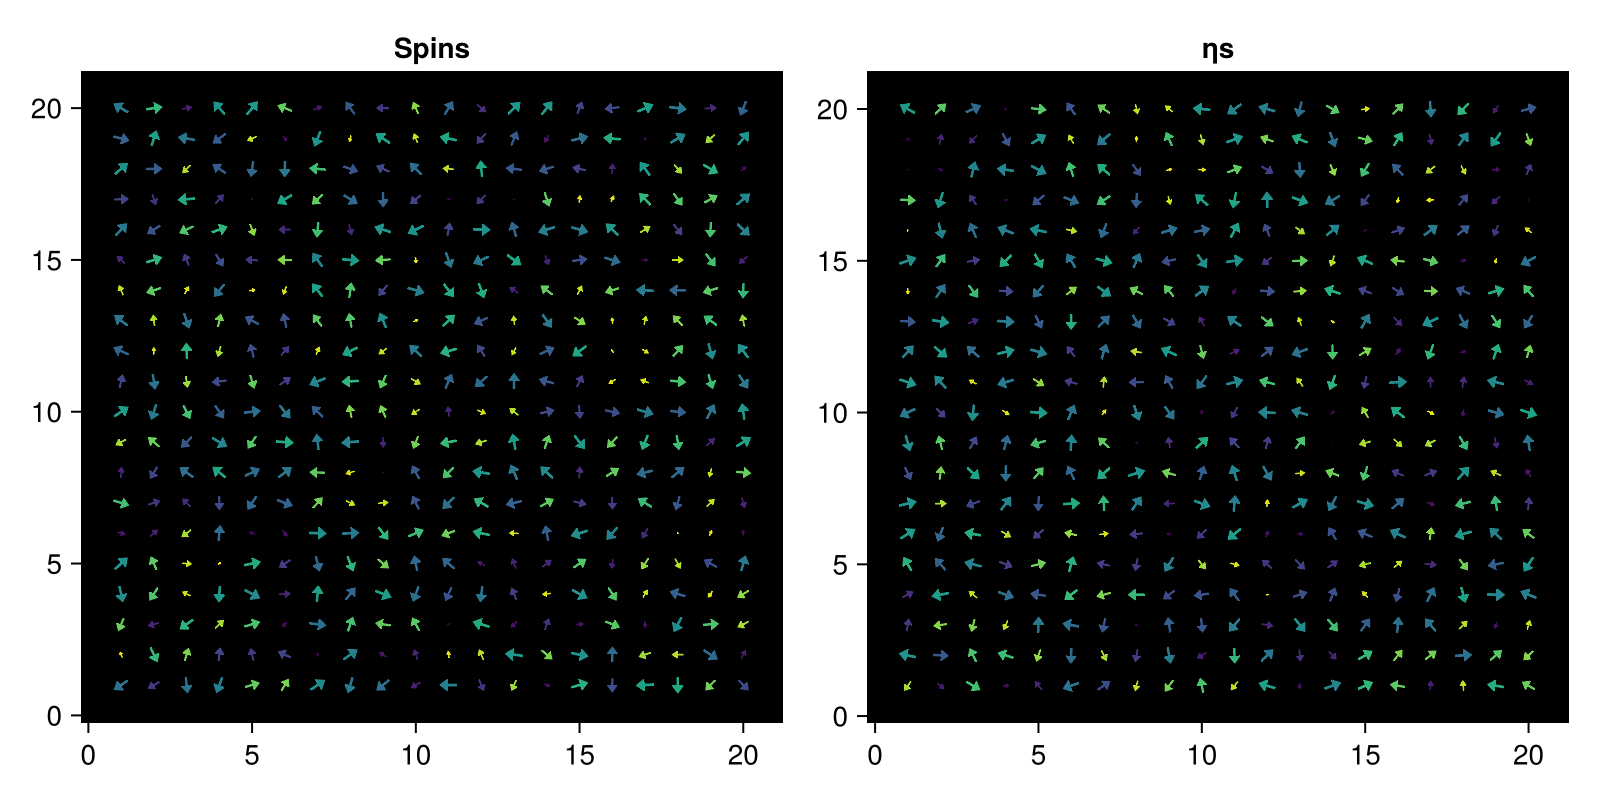

In [21]:
generate_spins("stripe-anneal", 1)